<a href="https://colab.research.google.com/github/vijayabalan07/smart-iventory-management/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
products_df = pd.read_csv("/content/PRODUCTS.xls")
sales_df = pd.read_csv("/content/SALES.xls")
stores_df = pd.read_csv("/content/STORES.xls")
inventry_df = pd.read_csv("/content/Inventory1.xls")

In [2]:
import pandas as pd

# Load the data
sales_data = sales_df
stores_data = stores_df
inventory_data = inventry_df
products_data = products_df

# Convert date columns to datetime
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'])
sales_data['Delivery_Date'] = pd.to_datetime(sales_data['Delivery_Date'])
inventory_data['Last_Restock_Date'] = pd.to_datetime(inventory_data['Last_Restock_Date'])
stores_data['Open_Date'] = pd.to_datetime(stores_data['Open_Date'])

In [3]:
# Merge sales data with inventory data
merged_data = sales_data.merge(inventory_data, on=['Store_Key', 'Product_Key'], how='left')

# Aggregate sales data by date and store
time_series_data = merged_data.groupby(['Order_Date', 'Store_Key']).agg({'Quantity': 'sum'}).reset_index()

# Pivot the data to have each store as a column
time_series_data_pivot = time_series_data.pivot(index='Order_Date', columns='Store_Key', values='Quantity').fillna(0)

print(time_series_data_pivot.head())

Store_Key     0    1    2    4    5    6    8    9     10   12  ...   55  \
Order_Date                                                      ...        
2016-01-01  23.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   1.0  0.0  ...  0.0   
2016-01-02  43.0  0.0  7.0  0.0  0.0  0.0  0.0  8.0  12.0  0.0  ...  0.0   
2016-01-03   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   
2016-01-04  14.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0   0.0  0.0  ...  0.0   
2016-01-05   0.0  0.0  0.0  1.0  0.0  2.0  0.0  0.0   0.0  0.0  ...  0.0   

Store_Key     56    57    59    61   62    63   64   65    66  
Order_Date                                                     
2016-01-01   0.0   0.0   0.0   0.0  0.0   7.0  0.0  6.0  12.0  
2016-01-02  15.0  38.0  10.0   0.0  0.0  11.0  0.0  0.0  10.0  
2016-01-03   0.0   0.0   0.0   0.0  0.0   0.0  3.0  0.0   0.0  
2016-01-04   3.0   0.0   0.0   0.0  0.0   0.0  0.0  8.0   0.0  
2016-01-05   0.0   0.0   0.0  13.0  0.0   0.0  0.0  0.0  11.0  

[5 rows x 58 colum

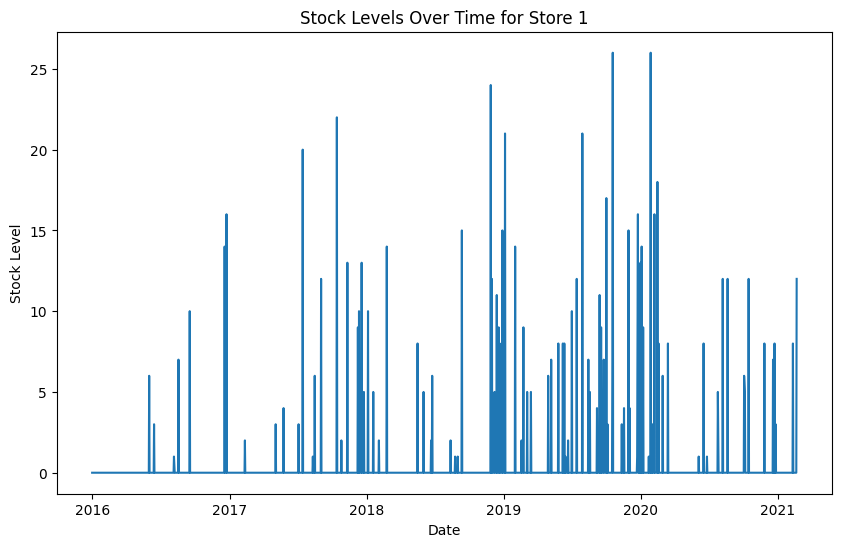

In [4]:
import matplotlib.pyplot as plt

# Plot the stock levels for a sample store
store_id = 1  # Change this to the store you want to analyze
plt.figure(figsize=(10, 6))
plt.plot(time_series_data_pivot[store_id])
plt.title(f'Stock Levels Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Stock Level')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Assume we are predicting stock levels for store 1
store_id = 1
data = time_series_data_pivot[store_id].values

# Train-test split
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

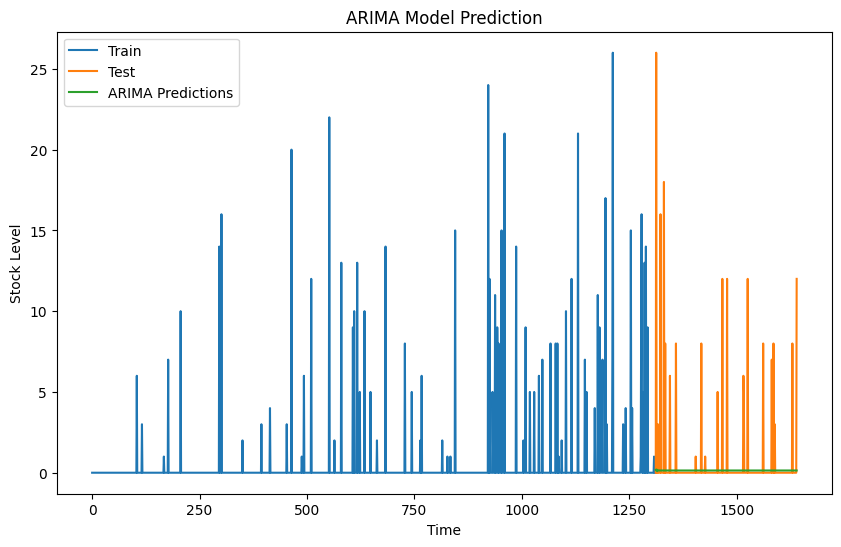

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.forecast(steps=len(test_data))

# Evaluate the model
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_data)), train_data, label='Train')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), arima_predictions, label='ARIMA Predictions')
plt.title('ARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Level')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0118
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112
Epoch 13/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 14/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113
Epoch 15/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 16/20
41/41 ━

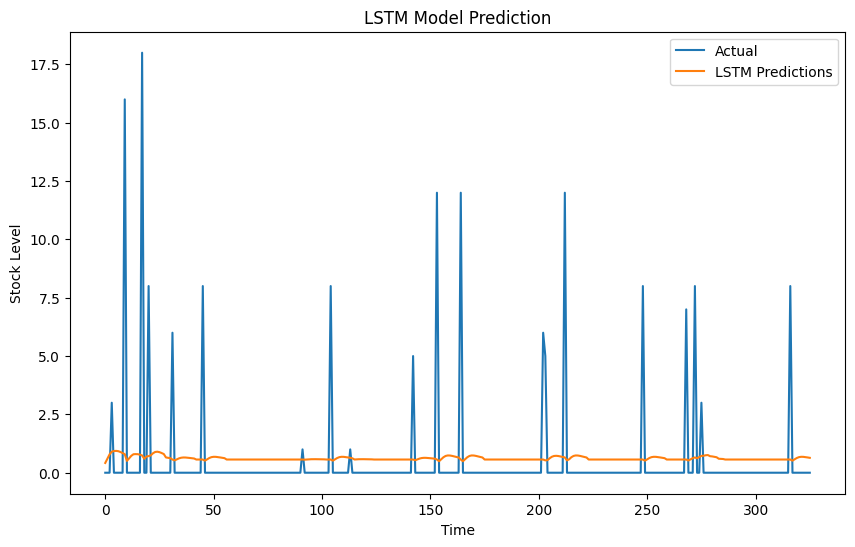

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title('LSTM Model Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Level')
plt.legend()
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Assuming the model is already trained
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Save the model
model.save('lstm_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
#sales_data = pd.read_csv('path/to/SALES.xls')
#inventory_data = pd.read_csv('path/to/Inventory1.xls')

# Merge and prepare the data
merged_data = pd.merge(sales_data, inventory_data, on=['Store_Key', 'Product_Key'])
merged_data['is_anomaly'] = 0  # Add a column to mark anomalies (0: normal, 1: anomaly)

# Split the data into features and target
X = merged_data.drop(columns=['is_anomaly'])
y = merged_data['is_anomaly']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
#sales_data = pd.read_csv('path/to/SALES.xls')
#inventory_data = pd.read_csv('path/to/Inventory1.xls')

# Merge and prepare the data
merged_data = pd.merge(sales_data, inventory_data, on=['Store_Key', 'Product_Key'])

# Convert date columns to numerical values
merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])
merged_data['Delivery_Date'] = pd.to_datetime(merged_data['Delivery_Date'])
merged_data['Order_Year'] = merged_data['Order_Date'].dt.year
merged_data['Order_Month'] = merged_data['Order_Date'].dt.month
merged_data['Order_Day'] = merged_data['Order_Date'].dt.day
merged_data['Delivery_Year'] = merged_data['Delivery_Date'].dt.year
merged_data['Delivery_Month'] = merged_data['Delivery_Date'].dt.month
merged_data['Delivery_Day'] = merged_data['Delivery_Date'].dt.day

# Drop the original Timestamp columns
merged_data = merged_data.drop(columns=['Order_Date', 'Delivery_Date'])

# Add a column to mark anomalies (0: normal, 1: anomaly)
merged_data['is_anomaly'] = 0

# Split the data into features and target
X = merged_data.drop(columns=['is_anomaly'])
y = merged_data['is_anomaly']

# Ensure all features are numerical
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12577

    accuracy                           1.00     12577
   macro avg       1.00      1.00      1.00     12577
weighted avg       1.00      1.00      1.00     12577



In [11]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Standard Deviation of CV Scores: {cv_scores.std()}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Standard Deviation of CV Scores: 0.0


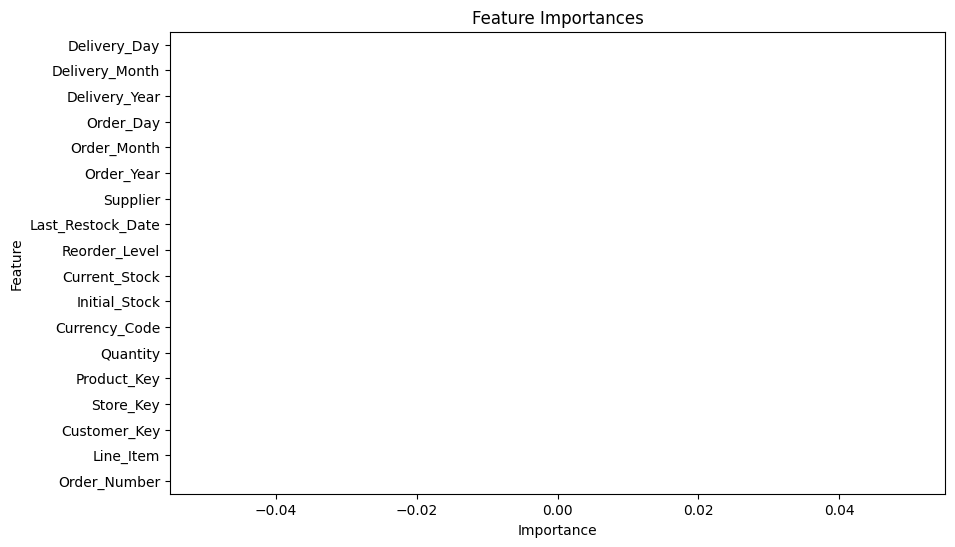

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [13]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12577

    accuracy                           1.00     12577
   macro avg       1.00      1.00      1.00     12577
weighted avg       1.00      1.00      1.00     12577



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the saved model
model = joblib.load('path/to/your_model.pkl')

# Function to get real-time predictions
def get_real_time_predictions(model, data):
    predictions = model.predict(data)
    return predictions

# Rest of your Streamlit code

ModuleNotFoundError: No module named 'streamlit'